# AI_Lv8_CA2_v8

**CCT College Dublin**  
**Bachelor of Science Honours in Computing in Information Technology**  
**Introduction to Artificial Intelligence - Y4M1**  
**Year 4, Semester 7**  
**Continuous Assessment 2**

**Lecturer name:** David McQuaid  
**Lecturer email:** dmcquaid@cct.ie

**Student Name:** Mateus Fonseca Campos  
**Student Number:** 2023327  
**Student Email:** 2023327@student.cct.ie

**Submission date:** 17 November 2023

#### Questions

1. A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages.

| 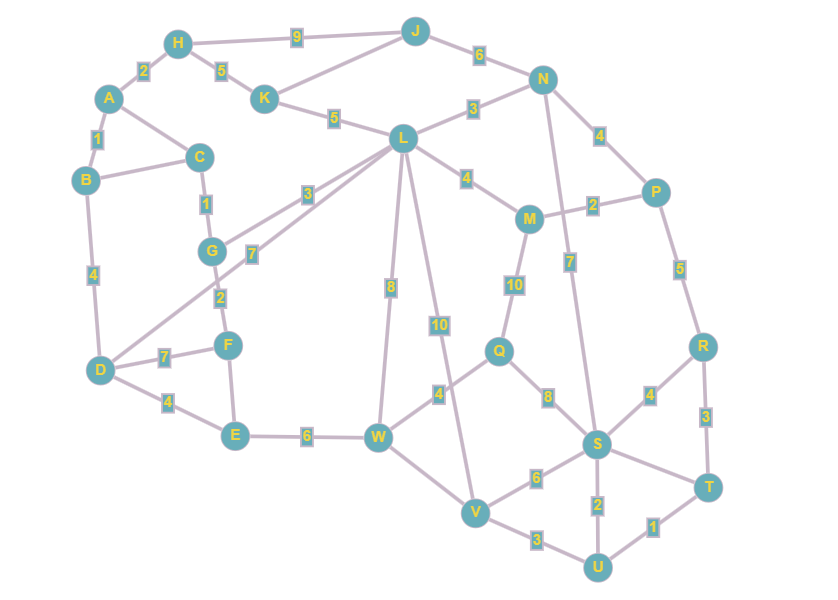 |
| :-: |
| *Fig. 1* |

&emsp;&emsp;(a) The graph in Fig. 1 is a visualisation of the problem.  
&emsp;&emsp;&emsp;(i) Identify the differences between a graph and a tree. [0-5]

&emsp;&emsp;&emsp;(ii) Explain in detail how the graph is an abstraction of the problem. [0-5]

&emsp;&emsp;&emsp;(iii) Identify the advantages of using a visualisation such as the one shown in Fig. 1. [0-5]

&emsp;&emsp;(b) Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage. [0-25]

2. The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed. [0-60]